In [1]:

import glob
import itertools
import math
import numpy as np
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset # module to open netcdf
import os
import pylab
import sys  #module to get external varaibles
import scipy.signal
import time

In [2]:
sys.path.insert(0, "/home/vestella/Python/Tools")
import corr_VEP as corrVEP
import stats_VEP as statsVEP
import Diags_VEP as diagsVEP
loc="/data/igcmg/database/grids"
os.chdir(loc)
os.getcwd()
file2read1 = Dataset('ORCA2.3_grid.nc','r')
area = np.array(file2read1.variables['area'])
lon = np.array(file2read1.variables['lon'])
lat = np.array(file2read1.variables['lat'])

In [3]:
## Heat Fluxes Mean

dir1 = '/data/vestella'
os.chdir(dir1)

f = Dataset('sosaline_year5559.nc','r')
tab=np.squeeze(f.variables['sos'][:,:,:])


# apply mask
mask_zomsfatl=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
mask_zomsfatl[ma.where(tab==0)]=1.   
mask_zomsfatl[ma.where(tab>=100)]=1. 
# mask array
tab_masked=np.ma.array(tab, mask=mask_zomsfatl)

# annual mean
tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
tab_masked_ann=ma.mean(tab_masked_temp,axis=0)
tab_masked_ann.shape

(1, 149, 182)

In [4]:
loc="/data/igcmg/database/grids"
os.chdir(loc)
os.getcwd()
file2read1 = Dataset('ORCA2.3_grid.nc','r')
area = np.array(file2read1.variables['area'])
lon = np.array(file2read1.variables['lon'])
lat = np.array(file2read1.variables['lat'])
index_SO = np.where((lat<-50)&(lat>-70))
c= np.where((lat<20)&(lat>-20))
d = np.where((lon[c[0], c[1]]<110)&(lon[c[0], c[1]]>50) )
index_Indian = [c[0][d],c[1][d]]
c= np.where((lat<45)&(lat>-45))
d = np.where((lon[c[0], c[1]]<-100)&(lon[c[0], c[1]]>=-160) )
index_Pacific = [c[0][d],c[1][d]]
c= np.where((lat<70)&(lat>50))
d = np.where((lon[c[0], c[1]]<0)&(lon[c[0], c[1]]>-60) )
index_SPNA = [c[0][d],c[1][d]]
c= np.where((lat<50)&(lat>20))
d = np.where((lon[c[0], c[1]]<0)&(lon[c[0], c[1]]>-80) )
index_STNA = [c[0][d],c[1][d]]
c= np.where((lat<0)&(lat>-40))
d = np.where((lon[c[0], c[1]]<10)&(lon[c[0], c[1]]>-50) )
index_SA = [c[0][d],c[1][d]]

In [5]:
Regions = []    
Regions.append({'name': 'Southern Ocean',
                'index':index_SO})
Regions.append({'name': 'Indian Ocean',
                'index':index_Indian})
Regions.append({'name': 'Pacific Ocean',
                'index':index_Pacific})
Regions.append({'name': 'SubPolar North Atlantic',
                'index':index_SPNA})
Regions.append({'name': 'SubTropical North Atlantic',
                'index':index_STNA})
Regions.append({'name': 'Southern Atlantic',
                'index':index_SA})
nRegions=6

# These are the defined regions

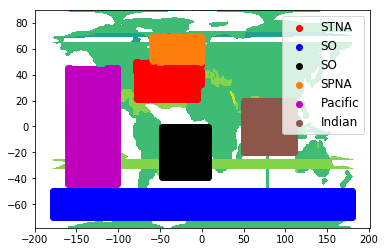

In [87]:
plt.contourf(lon,lat, tab_masked_ann[0,:,:])
plt.scatter(lon[index_STNA],lat[index_STNA], color ='r', label = 'STNA')
plt.scatter(lon[index_SO],lat[index_SO], color ='b', label = 'SO')
plt.scatter(lon[index_SA],lat[index_SA], color ='k', label = 'SO')
plt.scatter(lon[index_SPNA],lat[index_SPNA], color ='tab:orange', label = 'SPNA')
plt.scatter(lon[index_Pacific],lat[index_Pacific], color ='m', label = 'Pacific')
plt.scatter(lon[index_Indian],lat[index_Indian], color ='tab:brown', label = 'Indian')
plt.legend(loc=1, fontsize=12 )
plt.show()

In [6]:
Models = []

Models.append({
              'name': 'Control',
              'label':'Control',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'grey',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGSSTSNoI',
              'label':'GlobSSTSC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:olive',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGSSTSNoIC1',
              'label':'GlobSSTSC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:olive',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGSSTSNoIC2',
              'label':'GlobSSTSC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:olive',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})



Models.append({
              'name': 'VGMSFGTGCORCA2',
              'label':'FmskConvFgT',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:grey',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'VGGMSSTSNoI',
              'label':'FmskSC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGMSSTSC12',
              'label':'FmskSC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGMSSTSC22',
              'label':'FmskSC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGilConvORCA2',
              'label':'FmskConvC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'green',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'VGGilConvC12',
              'label':'FmskConvC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'green',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGilConvC22',
              'label':'FmskConvC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'green',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGMSM60NTGConv',
              'label':'FmskConv60NTC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'blue',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'VGConv60NTC12',
              'label':'FmskConv60NTC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'blue',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGConv60NTC22',
              'label':'FmskConv60NTC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'blue',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'VGConv60NGMTC0',
              'label':'FmskConv60NSFmskTC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:cyan',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGConv60NGMTC1',
              'label':'FmskConv60NSFmskTC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:cyan',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGConv60NGMTC2',
              'label':'FmskConv60NSFmskTC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:cyan',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})



Models.append({
              'name': 'VGConvGMTC0',
              'label':'FmskConvFmskTC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'magenta',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})
              
Models.append({
              'name': 'VGConvGMTC1',
              'label':'FmskConvFmskTC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'magenta',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})
Models.append({
              'name': 'VGConvGMTC2',
              'label':'FmskConvFmskTC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'magenta',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})



Models.append({
              'name': 'VGConv60NonlyGMTC0',
              'label':'FmskConv60NFmskTC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color': 'tab:orange',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'CM5A2.1.pi.debug',
              'label':'Target',
              'yr0':1,
              'yr1':101,
              'ts0':1350*12,
              'ts1':1450*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'k',
              'ls':'-',
              'lw':3,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

nmodels=22
ntarget=21

In [7]:
loc="/data/igcmg/database/grids"
os.chdir(loc)
os.getcwd()
file2read1 = Dataset('ORCA2.3_grid.nc','r')
area = np.array(file2read1.variables['area'])
depth = np.array(file2read1.variables['depth'])

loc="/data/vestella/VLR"
os.chdir(loc)
os.getcwd()
f = Dataset('Correlation_Basins_good1.nc','r')
Correlations = np.array(f.variables['Correlation'])[:,:,:]
sig_95_depth = np.array(f.variables['Sig95'])[:,:,:]
sig_99_depth = np.array(f.variables['Sig99'])[:,:,:]
f = Dataset('Correlation_Basins_good2.nc','r')
Correlations[3:6,:,:] = np.array(f.variables['Correlation'])[3:6,:,:]
sig_95_depth[3:6,:,:] = np.array(f.variables['Sig95'])[3:6,:,:]
sig_99_depth[3:6,:,:] = np.array(f.variables['Sig99'])[3:6,:,:]

loc="/data/vestella/VLR"
os.chdir(loc)
os.getcwd()
f = Dataset('Correlation_Basins_good1_S.nc','r')
Correlations_S = np.array(f.variables['Correlation'])[:,:,:]
sig_95_depth_S = np.array(f.variables['Sig95'])[:,:,:]
sig_99_depth_S = np.array(f.variables['Sig99'])[:,:,:]
f = Dataset('Correlation_Basins_good2_S.nc','r')
Correlations_S[3:6,:,:] = np.array(f.variables['Correlation'])[3:6,:,:]
sig_95_depth_S[3:6,:,:] = np.array(f.variables['Sig95'])[3:6,:,:]
sig_99_depth_S[3:6,:,:] = np.array(f.variables['Sig99'])[3:6,:,:]

# How did I compute the correlations in each of the regions?

i) Just averaged over the region <br>
ii) Correlate the resultant time series with the Target for each of the experiments <br>

# Plot all the correlations

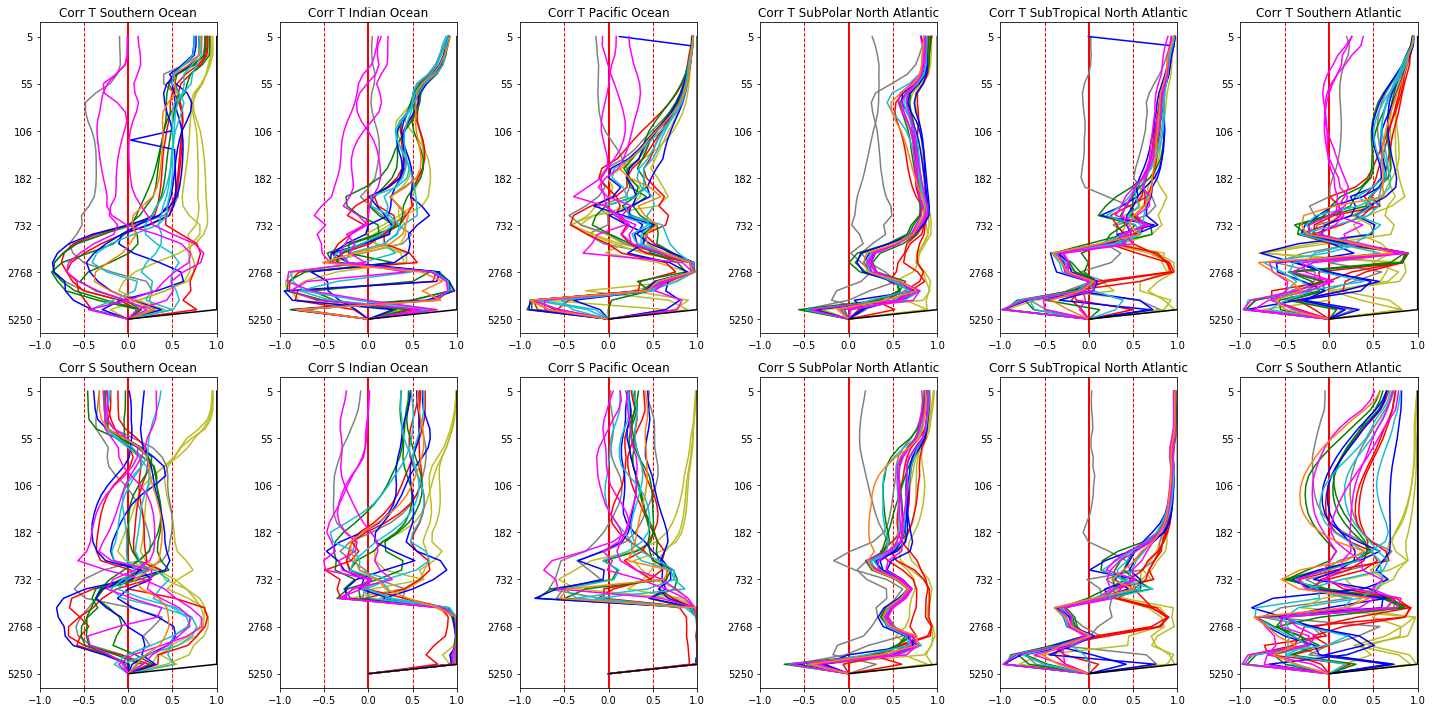

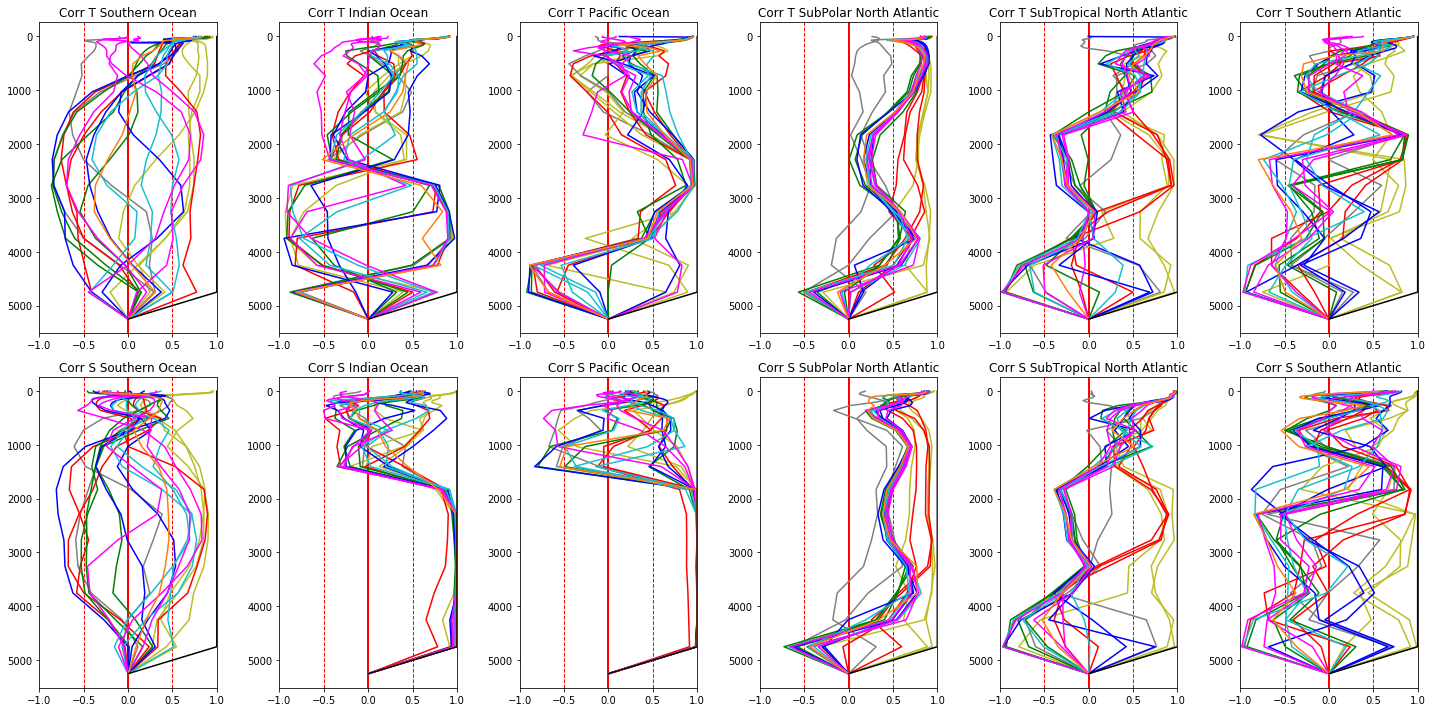

In [66]:
plt.close()
fig, axes = plt.subplots(2,6,figsize=(20,10))
for iRegion in range(nRegions):
    axes[0,iRegion].axvline(x=0, color='r', lw=2)
    axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    
    axes[1,iRegion].axvline(x=0, color='r', lw=2)
    axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    for imodel in range(nmodels):
        axes[0,iRegion].plot(Correlations[iRegion, imodel, :],np.arange(31), color =Models[imodel]['color'], label = Models[imodel]['label'] )
        axes[1,iRegion].plot(Correlations_S[iRegion, imodel, :],np.arange(31), color =Models[imodel]['color'], label = Models[imodel]['label'] )
    for i in range(31):
            if  np.abs(sig_95_depth[iRegion, imodel, i])<np.abs(Correlations[iRegion, imodel, i]):
                axes[0,iRegion].scatter(Correlations[iRegion, imodel, i], i, color =Models[imodel]['color'] )
            if  np.abs(sig_95_depth_S[iRegion, imodel, i])<np.abs(Correlations_S[iRegion, imodel, i]):
                axes[1,iRegion].scatter(Correlations_S[iRegion, imodel, i], i, color =Models[imodel]['color'] )
    axes[0,iRegion].set_xlim((-1,1))
    axes[0,iRegion].invert_yaxis()
    axes[0,iRegion].set_yticks(np.arange(0,31,5))
    axes[0,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
    axes[0,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
    axes[1,iRegion].set_xlim((-1,1))
    axes[1,iRegion].invert_yaxis()
    axes[1,iRegion].set_yticks(np.arange(0,31,5))
    axes[1,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
    axes[1,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
plt.tight_layout()   
plt.show()

plt.close()
fig, axes = plt.subplots(2,6,figsize=(20,10))
for iRegion in range(nRegions):
    axes[0,iRegion].axvline(x=0, color='r', lw=2)
    axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    
    axes[1,iRegion].axvline(x=0, color='r', lw=2)
    axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    for imodel in range(nmodels):
        axes[0,iRegion].plot(Correlations[iRegion, imodel, :],depth, color =Models[imodel]['color'], label = Models[imodel]['label'] )
        axes[1,iRegion].plot(Correlations_S[iRegion, imodel, :],depth, color =Models[imodel]['color'], label = Models[imodel]['label'] )
    for i in range(31):
            if  np.abs(sig_95_depth[iRegion, imodel, i])<np.abs(Correlations[iRegion, imodel, i]):
                axes[0,iRegion].scatter(Correlations[iRegion, imodel, i], depth[i], color =Models[imodel]['color'] )
            if  np.abs(sig_95_depth_S[iRegion, imodel, i])<np.abs(Correlations_S[iRegion, imodel, i]):
                axes[1,iRegion].scatter(Correlations_S[iRegion, imodel, i], depth[i], color =Models[imodel]['color'] )
    axes[0,iRegion].set_xlim((-1,1))
    axes[0,iRegion].invert_yaxis()
    axes[0,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
    axes[1,iRegion].set_xlim((-1,1))
    axes[1,iRegion].invert_yaxis()
    axes[1,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
plt.tight_layout()   
plt.show()

General comments: 

- Global SST/SSS gives the best reconstructions (yellow lines) 
- in the Atlantic (three right columns) the SPG seems to be the best reconstructed, as we go south things get worse in terms of reconstructions. 
- There is one of the Convoluted with SST limited 60N-60S that is no good in the surface in the subtropics (and in the Pacific), maybe that is the one with the odd low peak of the AMOC (in blue). 
- The Southern Atlantic is a bit of a mess, when not considering the nudging in the region.  

In [9]:
Ensemble= []

Ensemble.append({
              'label': 'GlobST',
              'models': [1,2,3],
              'color':'tab:olive',
              'ls':'-',
              'lw':3,})

Ensemble.append({
              'label': 'FMskSGlobT',
              'models': [5,6,7],
              'color':'red',
              'ls':'-',
              'lw':3,})

Ensemble.append({
              'label': 'FMskConvSGlobT',
              'models': [8,9,10],
              'color':'green',
              'ls':'-',
              'lw':3,})

Ensemble.append({
              'label': 'FMskConvS60NT',
              'models': [11,12,13],
              'color':'blue',
              'ls':'-',
              'lw':3,})

Ensemble.append({
              'label': 'FMskConvS60NFMskT',
              'models': [14,15,16],
              'color':'tab:cyan',
              'ls':'-',
              'lw':3,})

Ensemble.append({
              'label': 'FMskConvSFMskT',
              'models': [17,18,19],
              'color':'magenta',
              'ls':'-',
              'lw':3,})


nmembers=3
nensemble = 6

# Correlations of the ensembles

i) the correlation shown as mean and std is the one for the correlations of the ensemble members. The mean is the average of the ensemble's member correlations and the std is the std of the correlations for the ensemble's member. 



# Plot all the ensembles together, first plot depth (y-axis) in model grid and second plot with realistic depth!

These plots show the depth correlation for each of the regions for T on the top row and S on the bottom row for each of the defined regions: Southern Ocean, Pacific, Indian, SPG, STG, Southern Atlantic. 

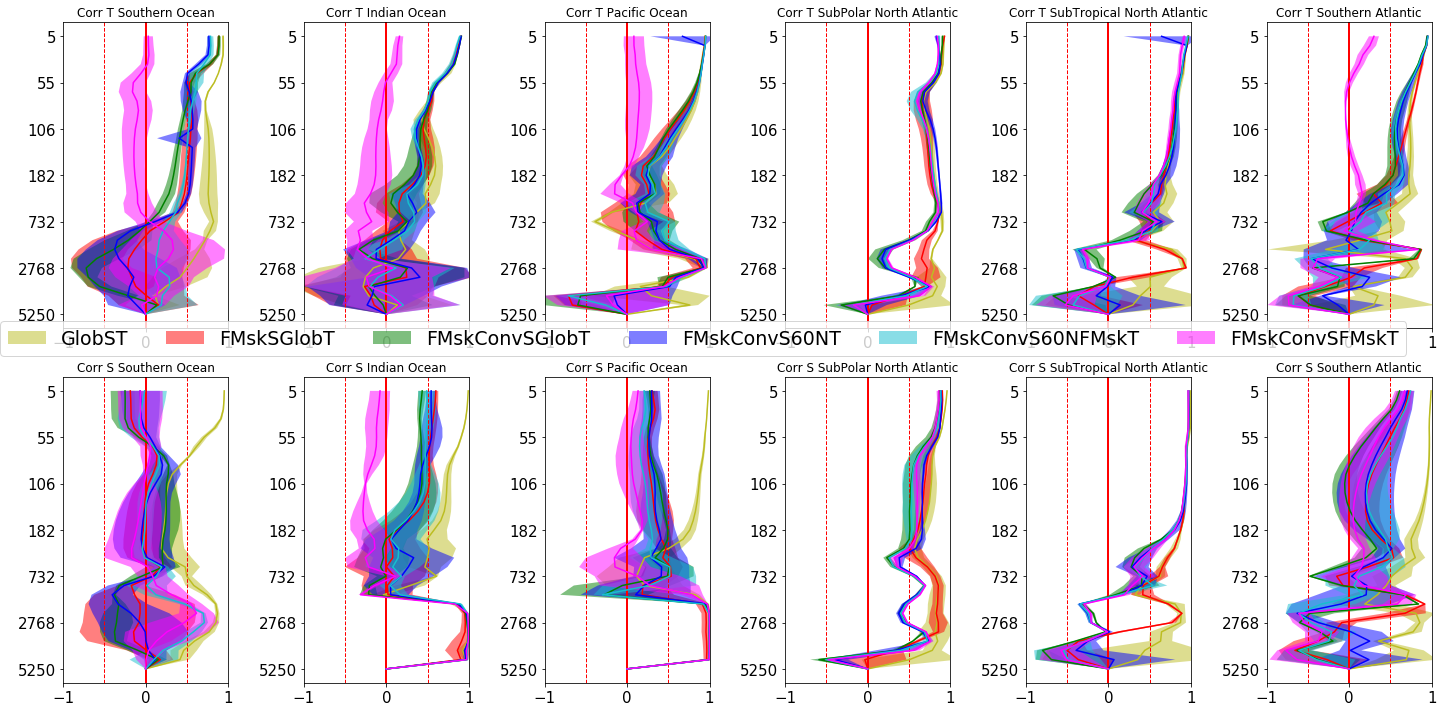

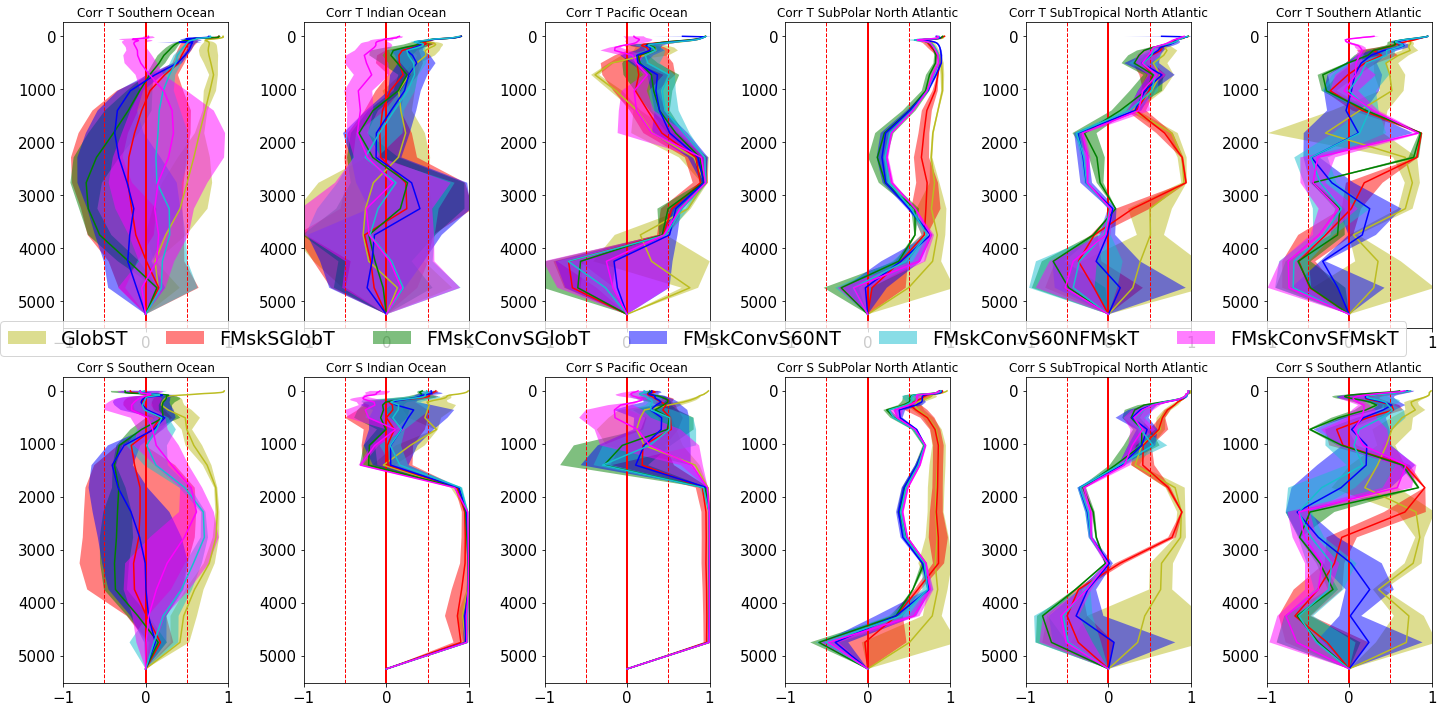

In [95]:
plt.close()
fig, axes = plt.subplots(2,6,figsize=(20,10))

for iRegion in range(nRegions):
    axes[0,iRegion].axvline(x=0, color='r', lw=2)
    axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    
    axes[1,iRegion].axvline(x=0, color='r', lw=2)
    axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    for iensemble in range(nensemble):
        Ennsemble = np.zeros((nmembers,31))
    
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[0,iRegion].plot(Average,np.arange(31), color =Ensemble[iensemble]['color'] )
        
        if iRegion == 0:
            
            axes[0,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std, label = Ensemble[iensemble]['label'],
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[0,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[1,iRegion].plot(Average,np.arange(31), color =Ensemble[iensemble]['color'] )
        
        if iRegion == 0:
            
            axes[1,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[1,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)

    axes[0,iRegion].set_xlim((-1,1))
    axes[1,iRegion].set_xlim((-1,1))

    s=0
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_yticks(np.arange(0,31,5))
    axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
    axes[s,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
    
    s=1
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_yticks(np.arange(0,31,5))
    axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
    axes[s,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
    
fig.legend( loc = (0, 0.5), ncol=6, fontsize=19 )
plt.tight_layout()   
plt.show()

plt.close()
fig, axes = plt.subplots(2,6,figsize=(20,10))

for iRegion in range(nRegions):
    axes[0,iRegion].axvline(x=0, color='r', lw=2)
    axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    
    axes[1,iRegion].axvline(x=0, color='r', lw=2)
    axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    for iensemble in range(nensemble):
        Ennsemble = np.zeros((nmembers,31))
    
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[0,iRegion].plot(Average,depth, color =Ensemble[iensemble]['color'] )
        
        if iRegion == 0:
            
            axes[0,iRegion].fill_betweenx(depth, Average-Std,  Average+Std, label = Ensemble[iensemble]['label'],
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[0,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[1,iRegion].plot(Average,depth, color =Ensemble[iensemble]['color'] )
        
        if iRegion == 0:
            
            axes[1,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[1,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)

    axes[0,iRegion].set_xlim((-1,1))
    axes[1,iRegion].set_xlim((-1,1))

    s=0
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
    
    s=1
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
    
fig.legend( loc = (0, 0.5), ncol=6, fontsize=19 )
plt.tight_layout()   
plt.show()

# Conclusions by regions:


i) southern Ocean -> global SSTS does the best job with no good correlation in the subsurface Salinity and with T as we increase the depth. <br>

ii) Indian -> Not a great job in T below the surface and S below 1500 m 1 of correlation (which I don't know is it is the limit of the boundaries or it's just that there is no variability there) we decrease good correlation as we move from the global SSTS experiment (yellow). <br>

iii) Pacific -> mode or less as the Indian, with weird Salinity correlation below 1500 m <br>


iv) SPG -> as we decrease resolution of SSS (yellow and red have good SSTS resolution) the SPG starts to fail (other ensembles with Convoluted reolution (green, blue, cyan and magenta). Not significant variations within the Convoluted experiments in termps of correlations. <br>


v) STG -> with the Convoluted we loose correlation a bit from the subsurface already and very drastically below 1500 m. Due to SSS nudging region reduction S/T correlation decreased below 3000 m (yellow and red).  <br>


v) Southern Atlantic -> a bit of a mess. With good resolution on one hand we are able to capture what I would guess is NADW around 2000 m depth (red) but for GlobSSTS we miss that range. or at least is not as high as the correlation with the FMskSglobT. The others do not seem to do a good job. 

# Plot each individual ensemble separately

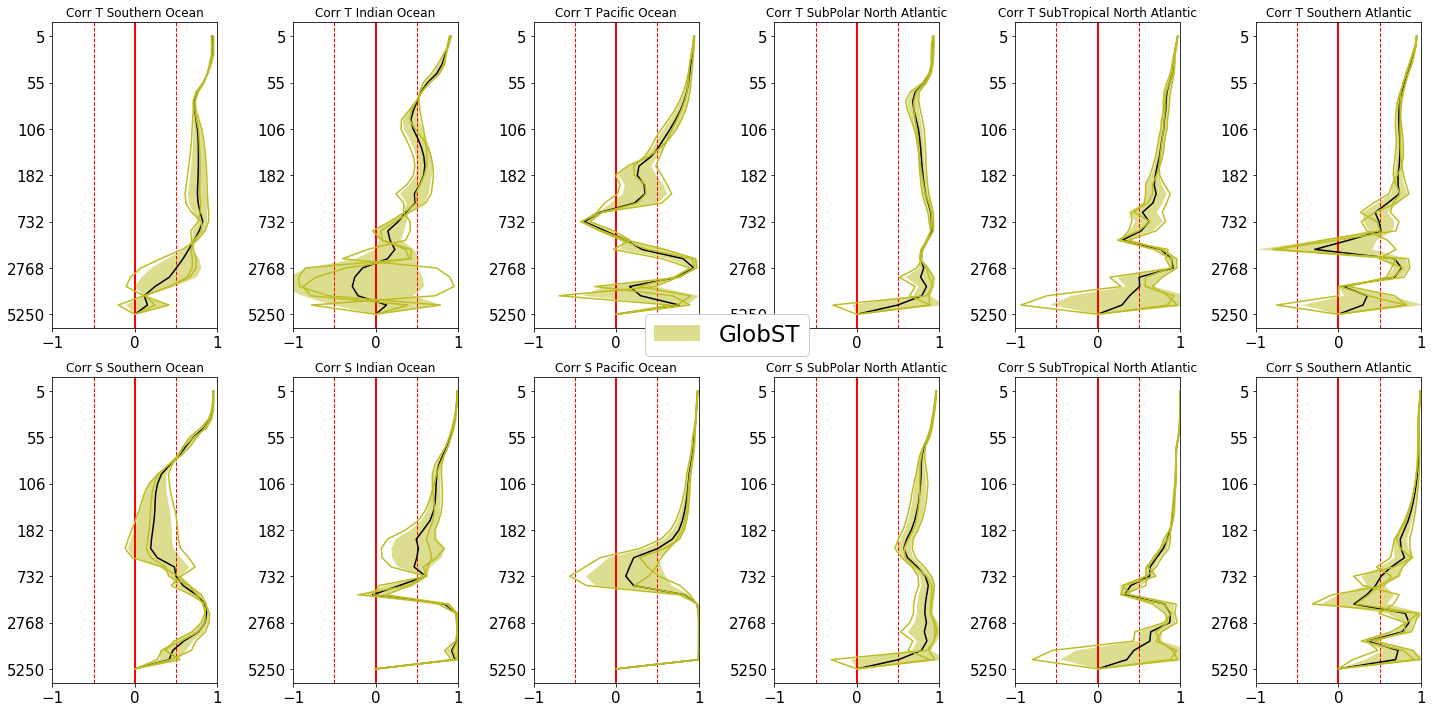

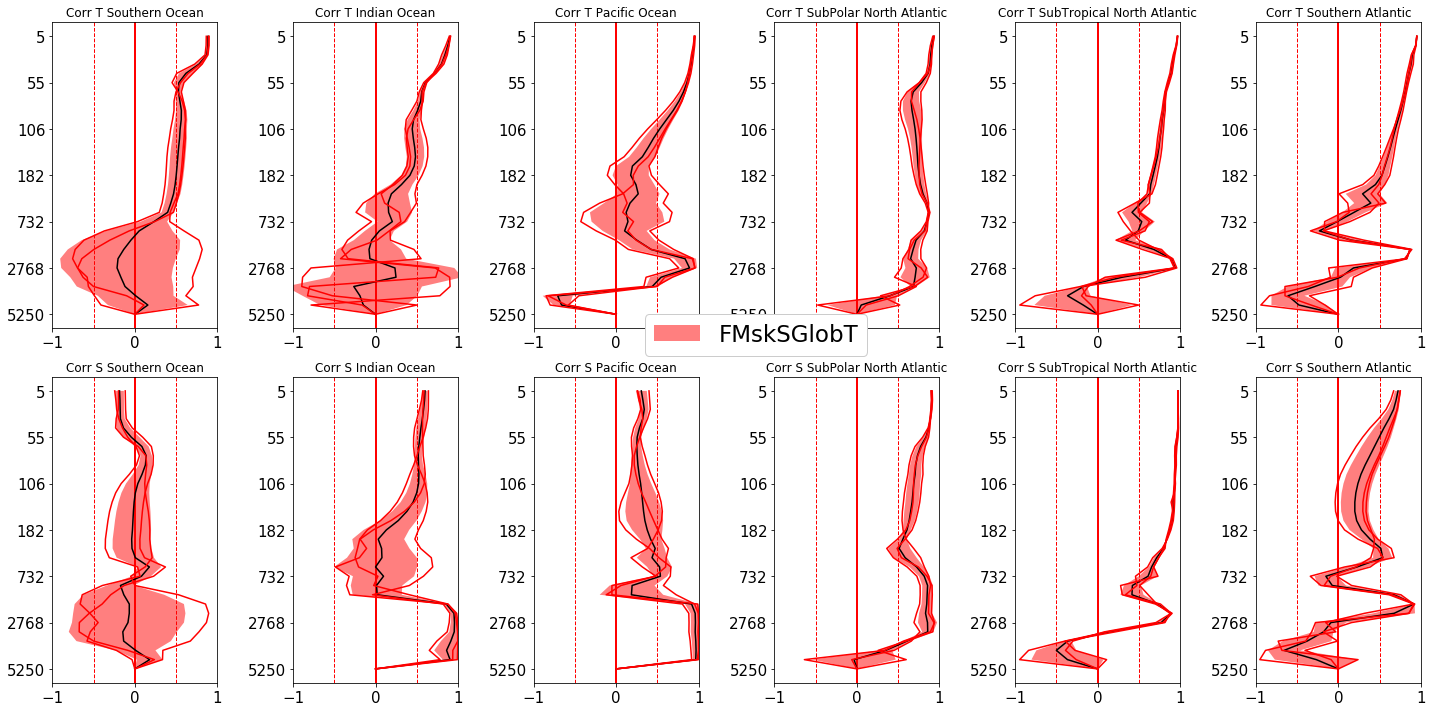

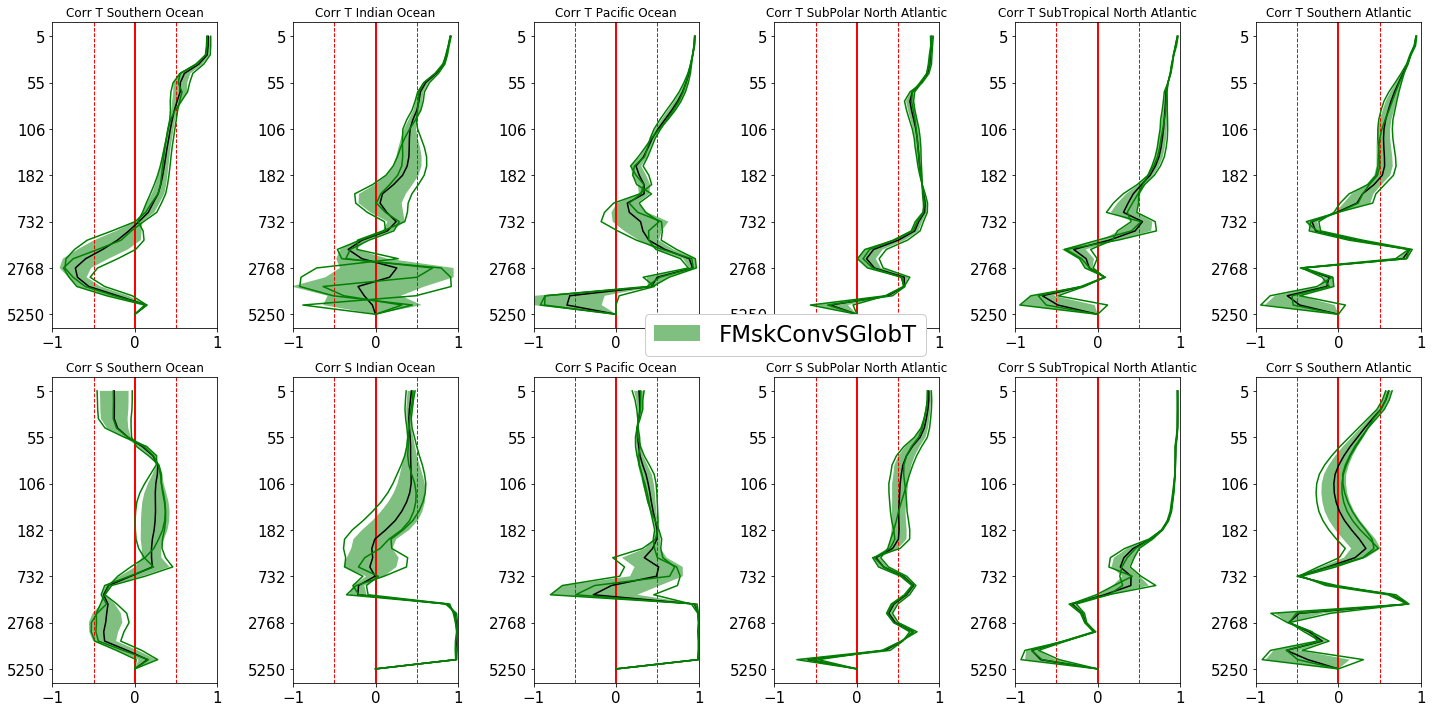

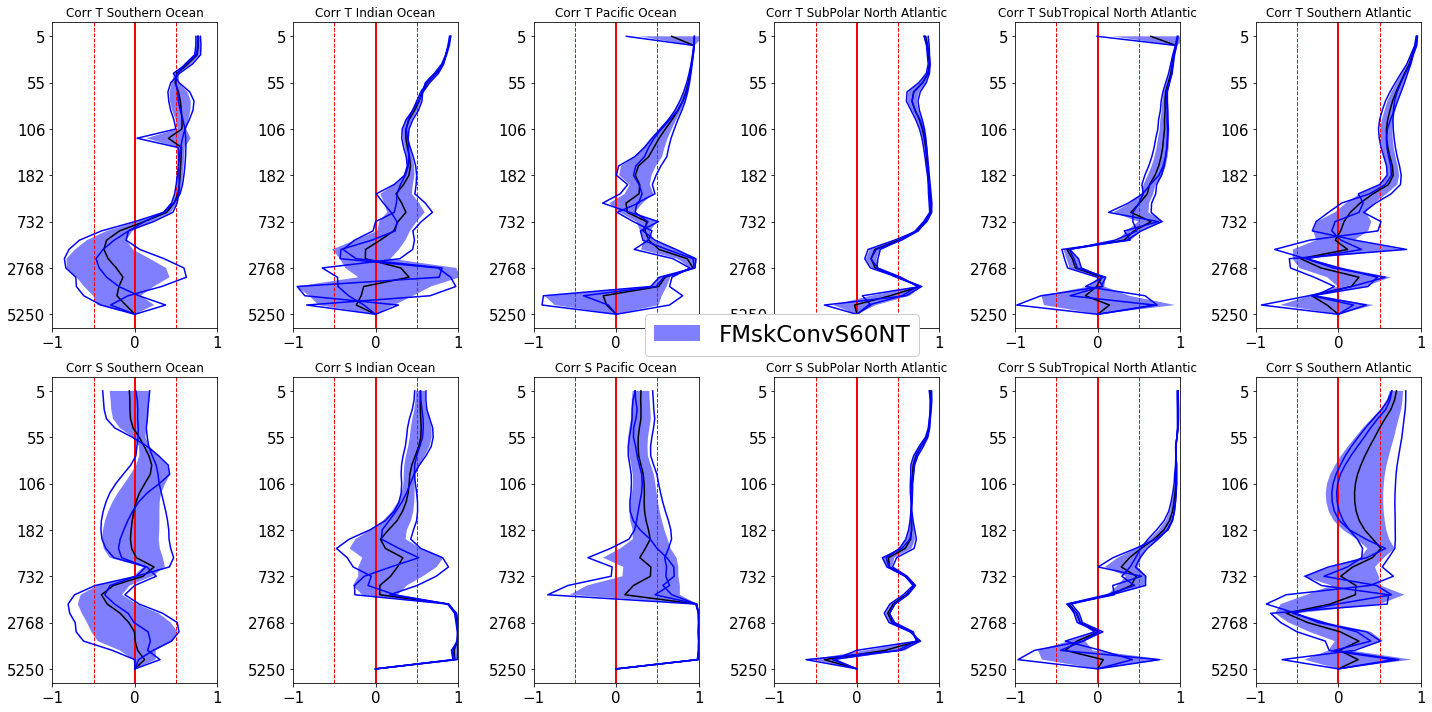

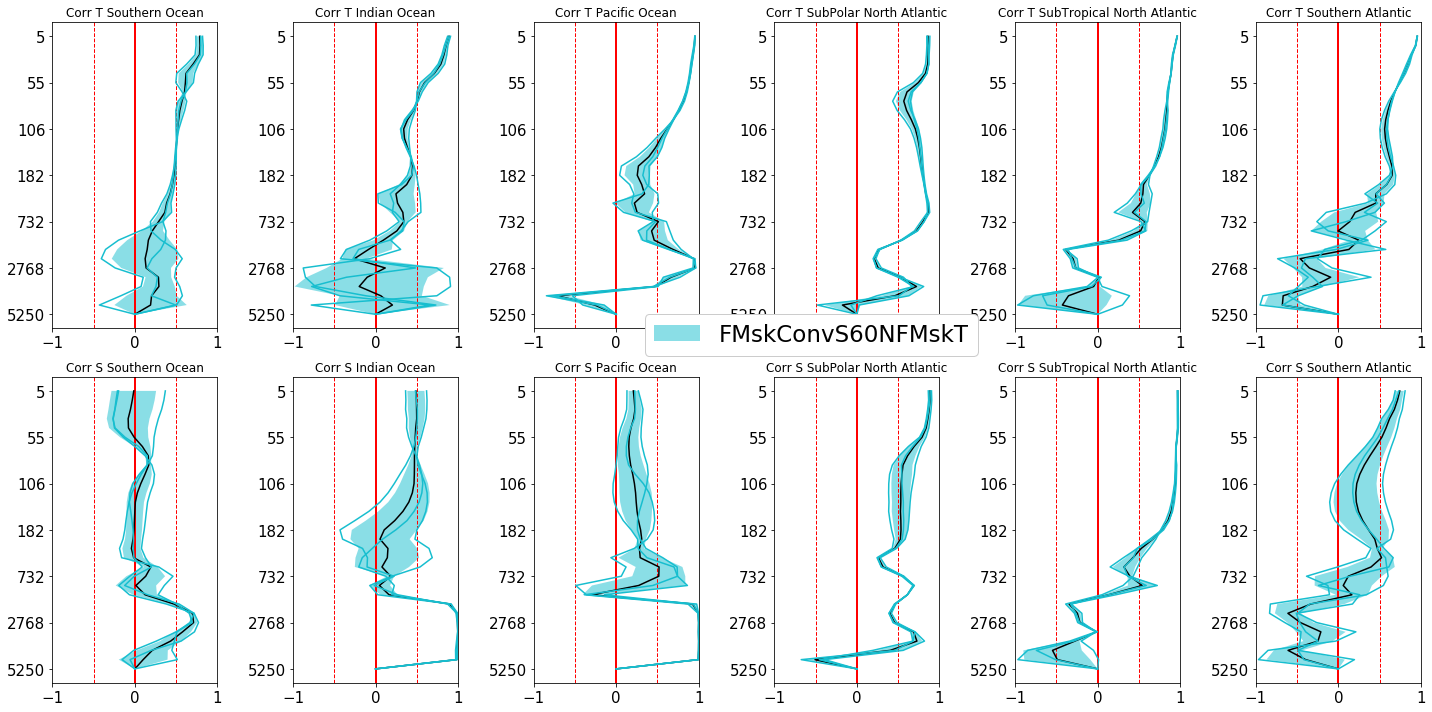

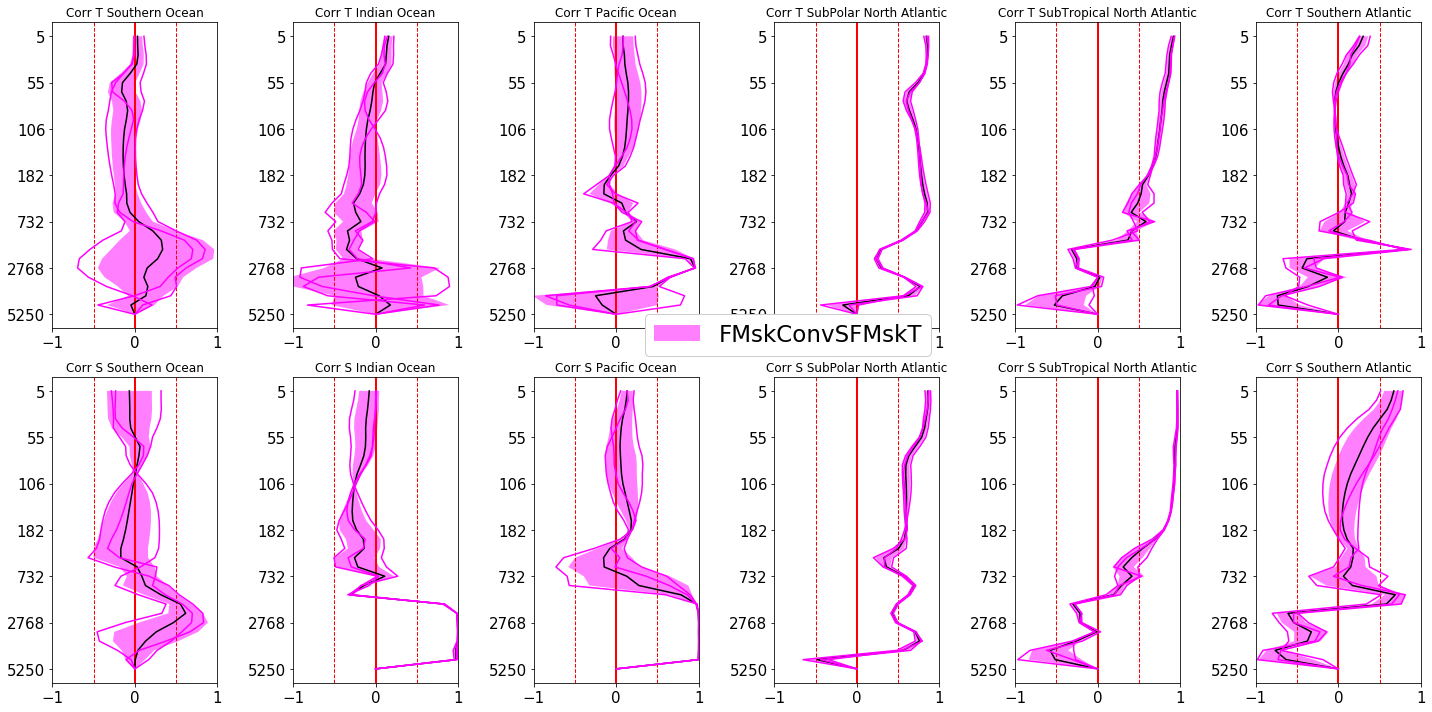

In [89]:
for iensemble in range(nensemble):
    
    plt.close()
    fig, axes = plt.subplots(2,6,figsize=(20,10))

    for iRegion in range(nRegions):
        axes[0,iRegion].axvline(x=0, color='r', lw=2)
        axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
        axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')

        axes[1,iRegion].axvline(x=0, color='r', lw=2)
        axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
        axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')

        Ennsemble = np.zeros((nmembers,31))
    
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[0,iRegion].plot(Average,np.arange(31), color =Models[imodel]['color'] )
        
        for imember in range(nmembers):
            axes[0,iRegion].plot(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:],np.arange(31),color=Ensemble[iensemble]['color'])

        if iRegion == 0:
            
            axes[0,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std, label = Ensemble[iensemble]['label'],
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[0,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[1,iRegion].plot(Average,np.arange(31), color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[1,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[1,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        for imember in range(nmembers):
            axes[1,iRegion].plot(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:],np.arange(31),color=Ensemble[iensemble]['color'])

    

        s=0
        axes[s,iRegion].tick_params(axis='y', labelsize=15)
        axes[s,iRegion].tick_params(axis='x', labelsize=15)
        axes[s,iRegion].invert_yaxis()
        axes[s,iRegion].set_yticks(np.arange(0,31,5))
        axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
        axes[s,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
        axes[s,iRegion].set_xlim((-1,1))
        
        s=1
        axes[s,iRegion].tick_params(axis='y', labelsize=15)
        axes[s,iRegion].tick_params(axis='x', labelsize=15)
        axes[s,iRegion].invert_yaxis()
        axes[s,iRegion].set_yticks(np.arange(0,31,5))
        axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
        axes[s,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
        axes[s,iRegion].set_xlim((-1,1))
    
    fig.legend( loc = (0.45, 0.5), ncol=6, fontsize=23,framealpha=1 )
    plt.tight_layout()   
    plt.show()

# Plot each individual ensemble separately with standard depth

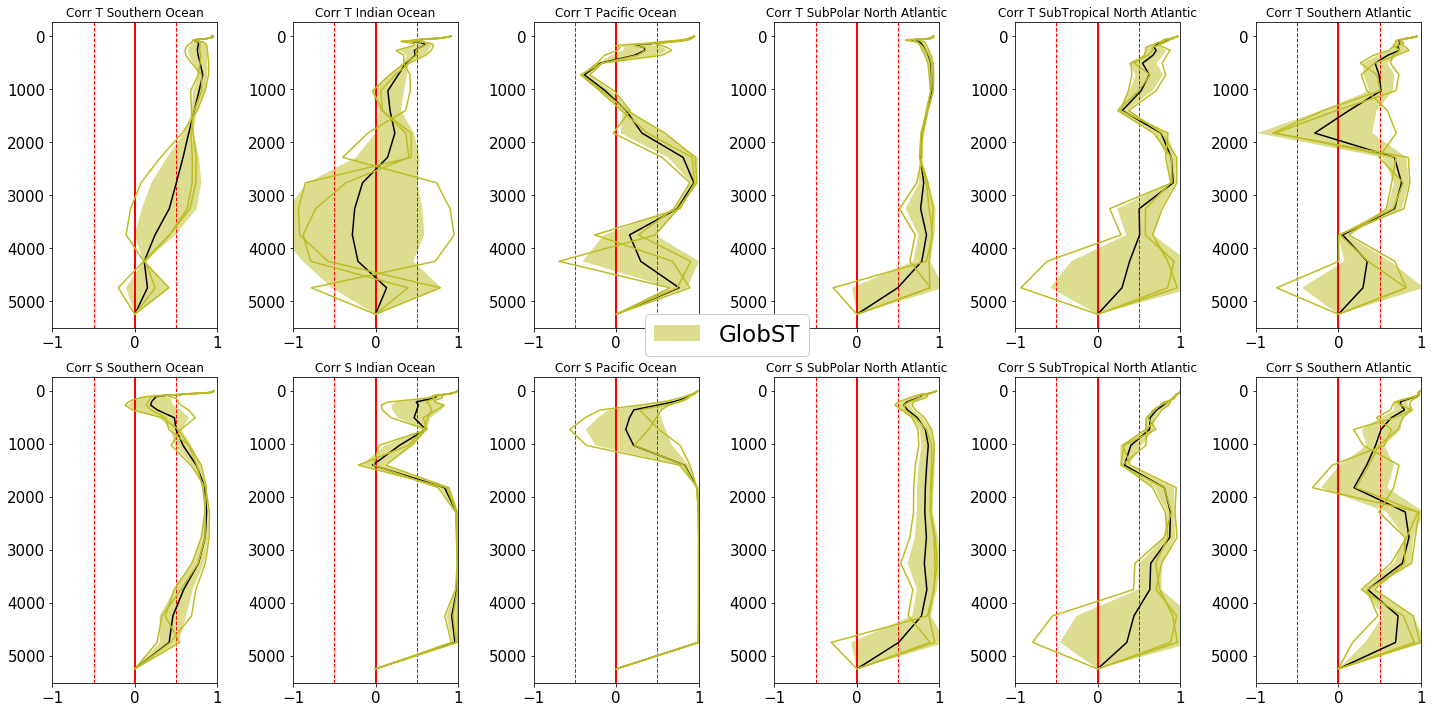

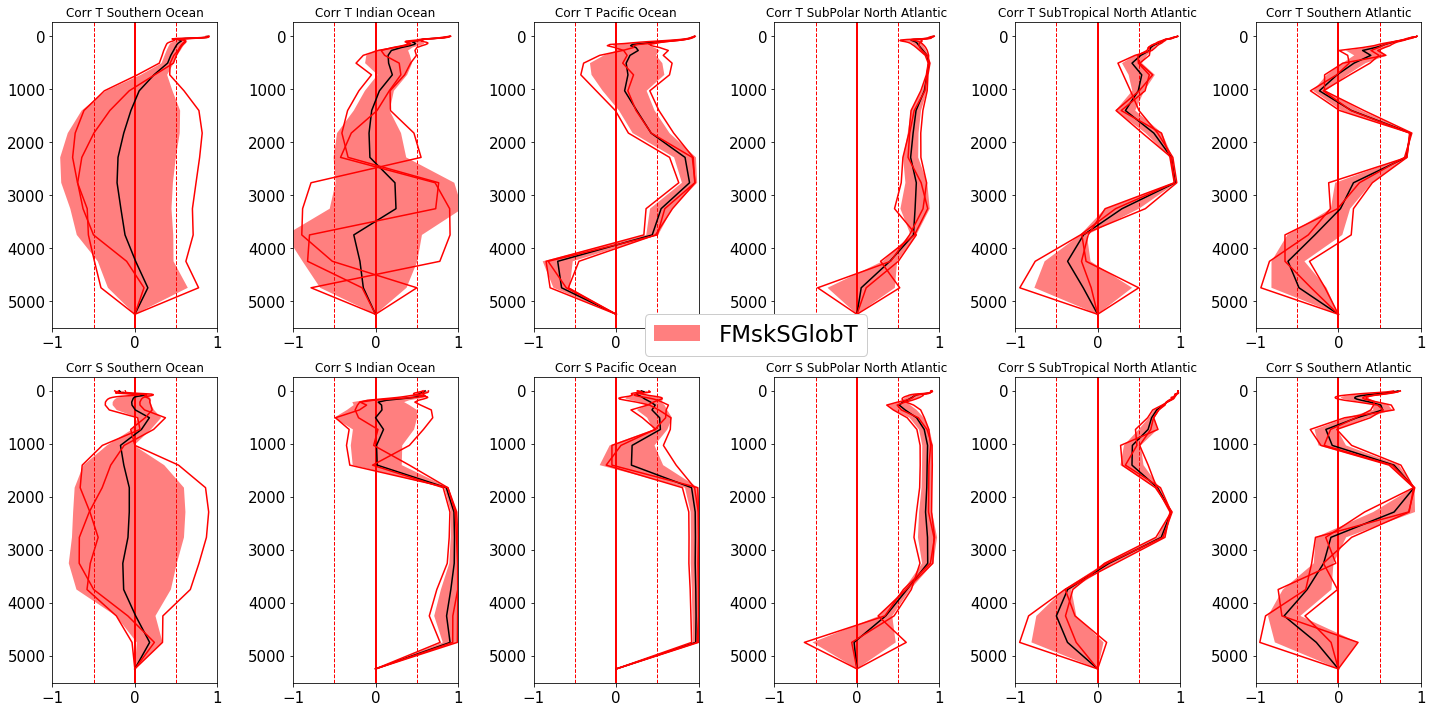

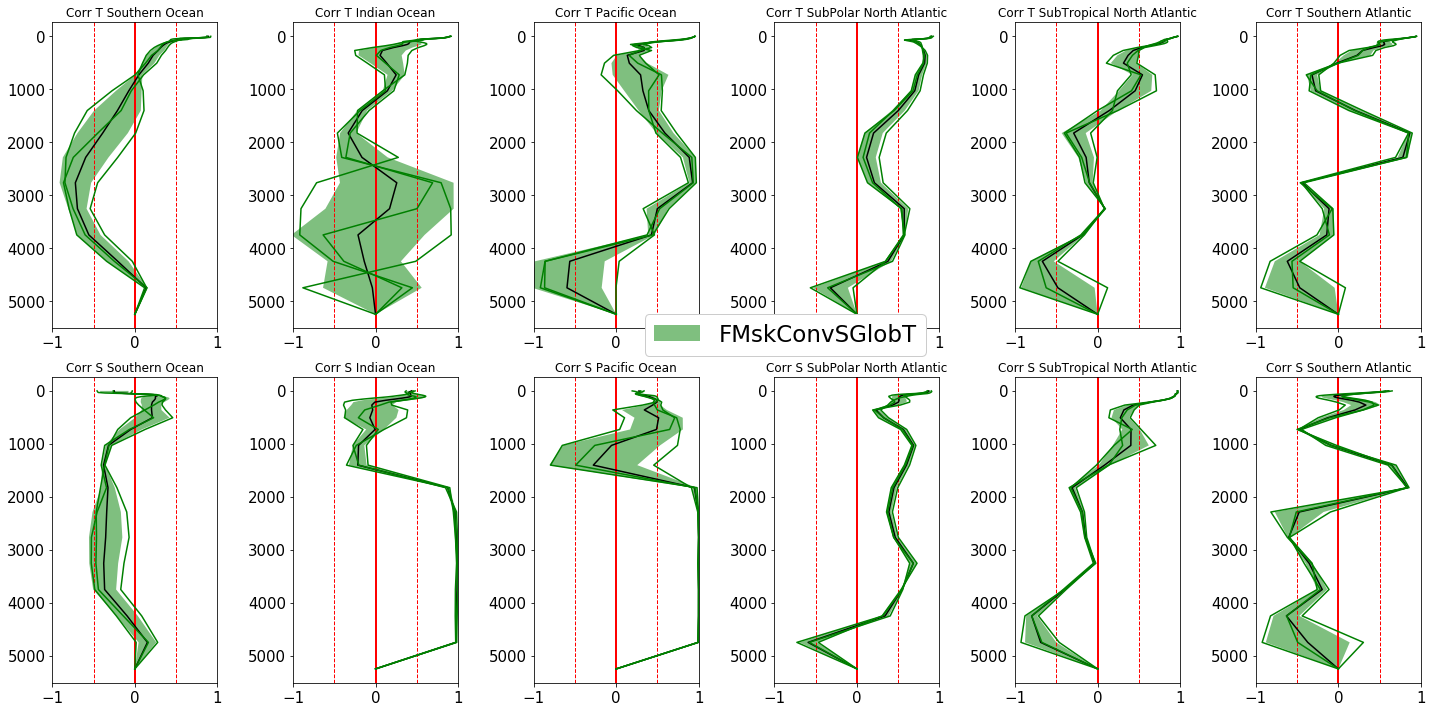

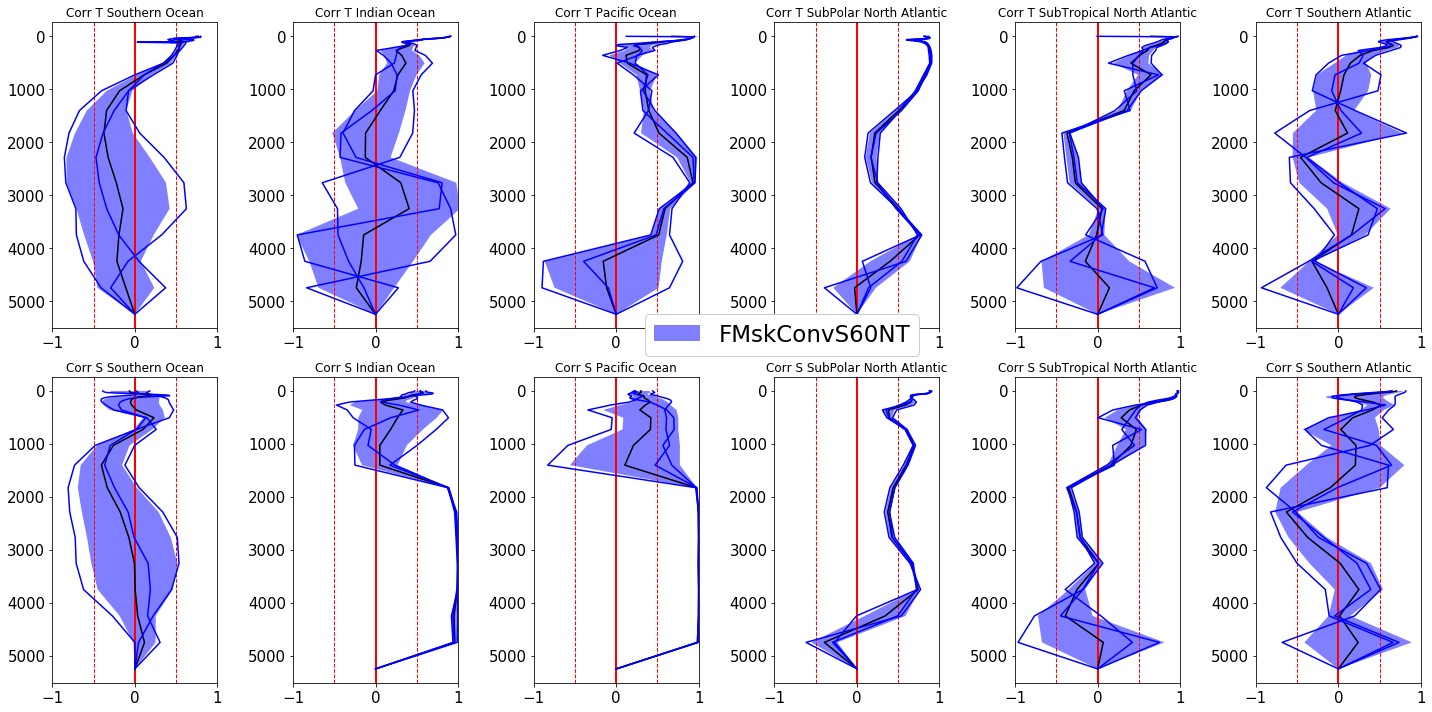

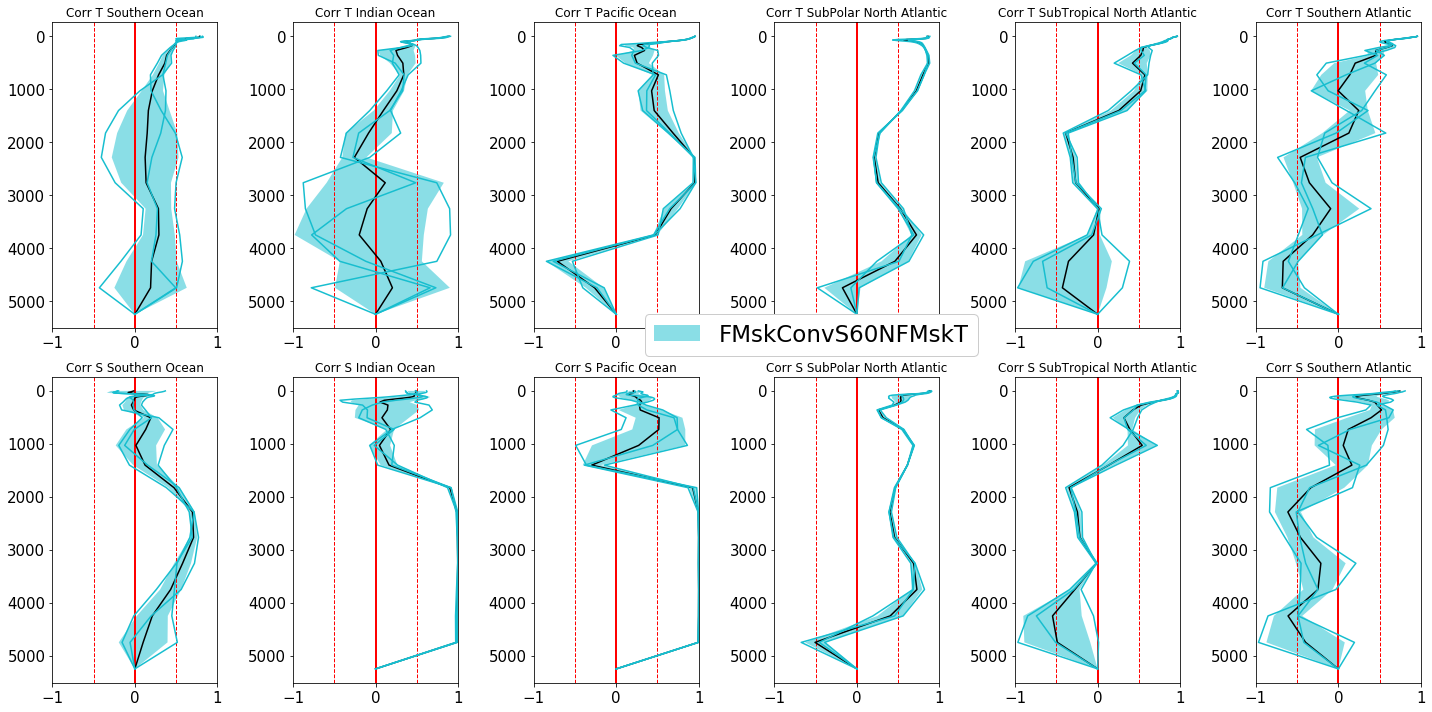

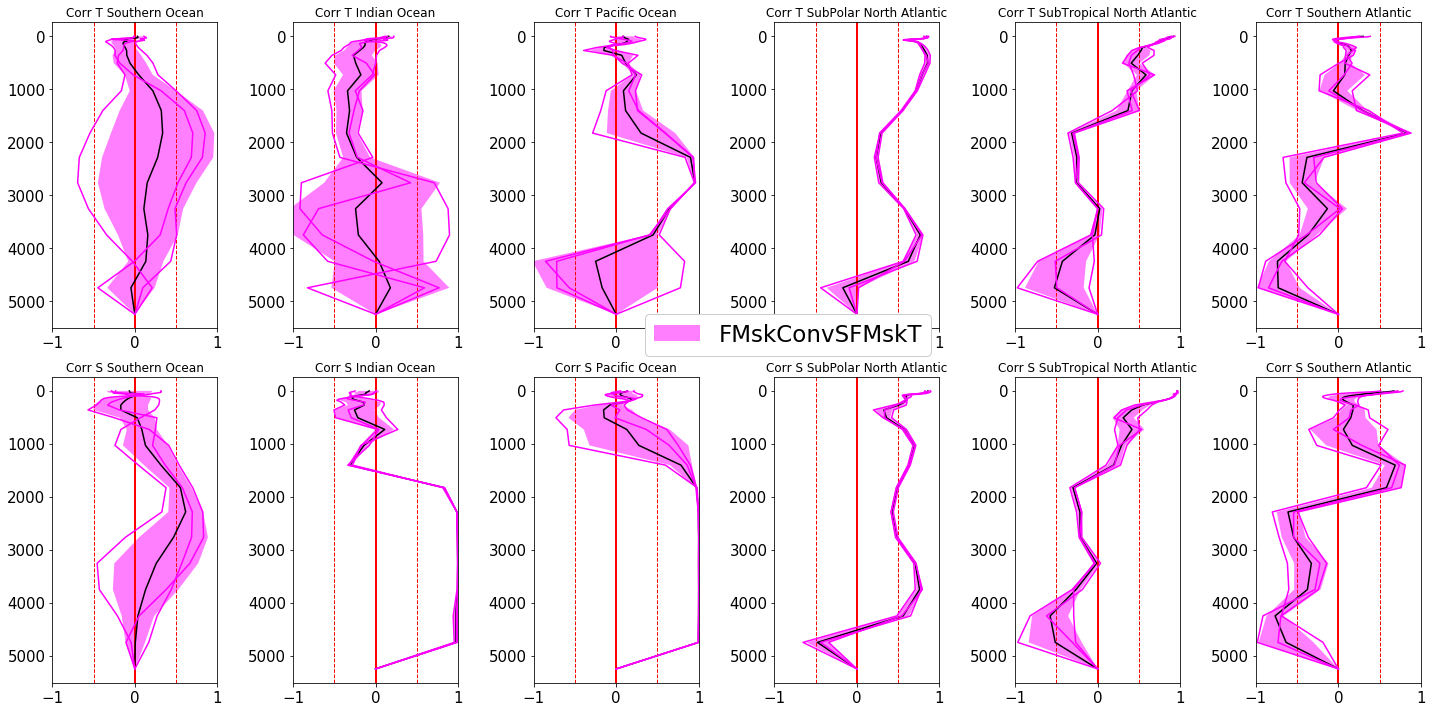

In [57]:
for iensemble in range(nensemble):
    
    plt.close()
    fig, axes = plt.subplots(2,6,figsize=(20,10))

    for iRegion in range(nRegions):
        axes[0,iRegion].axvline(x=0, color='r', lw=2)
        axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
        axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')

        axes[1,iRegion].axvline(x=0, color='r', lw=2)
        axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
        axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')

        Ennsemble = np.zeros((nmembers,31))
    
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[0,iRegion].plot(Average,depth, color =Models[imodel]['color'] )
        
        for imember in range(nmembers):
            axes[0,iRegion].plot(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:],depth,color=Ensemble[iensemble]['color'])
        
        if iRegion == 0:
            
            axes[0,iRegion].fill_betweenx(depth, Average-Std,  Average+Std, label = Ensemble[iensemble]['label'],
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[0,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[1,iRegion].plot(Average,depth, color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[1,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[1,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)

        for imember in range(nmembers):
            axes[1,iRegion].plot(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:],depth,color=Ensemble[iensemble]['color'])

    

        s=0
        axes[s,iRegion].tick_params(axis='y', labelsize=15)
        axes[s,iRegion].tick_params(axis='x', labelsize=15)
        axes[s,iRegion].invert_yaxis()
        #axes[s,iRegion].set_yticks(depth[::])
        #axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
        axes[s,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
        axes[s,iRegion].set_xlim((-1,1))
        
        s=1
        axes[s,iRegion].tick_params(axis='y', labelsize=15)
        axes[s,iRegion].tick_params(axis='x', labelsize=15)
        axes[s,iRegion].invert_yaxis()
        #axes[s,iRegion].set_yticks(np.arange(0,31,5))
        #axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
        axes[s,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
        axes[s,iRegion].set_xlim((-1,1))
    
    fig.legend( loc = (0.45, 0.5), ncol=6, fontsize=23,framealpha=1 )
    plt.tight_layout()   
    plt.show()

# Here I compared the global and our best case

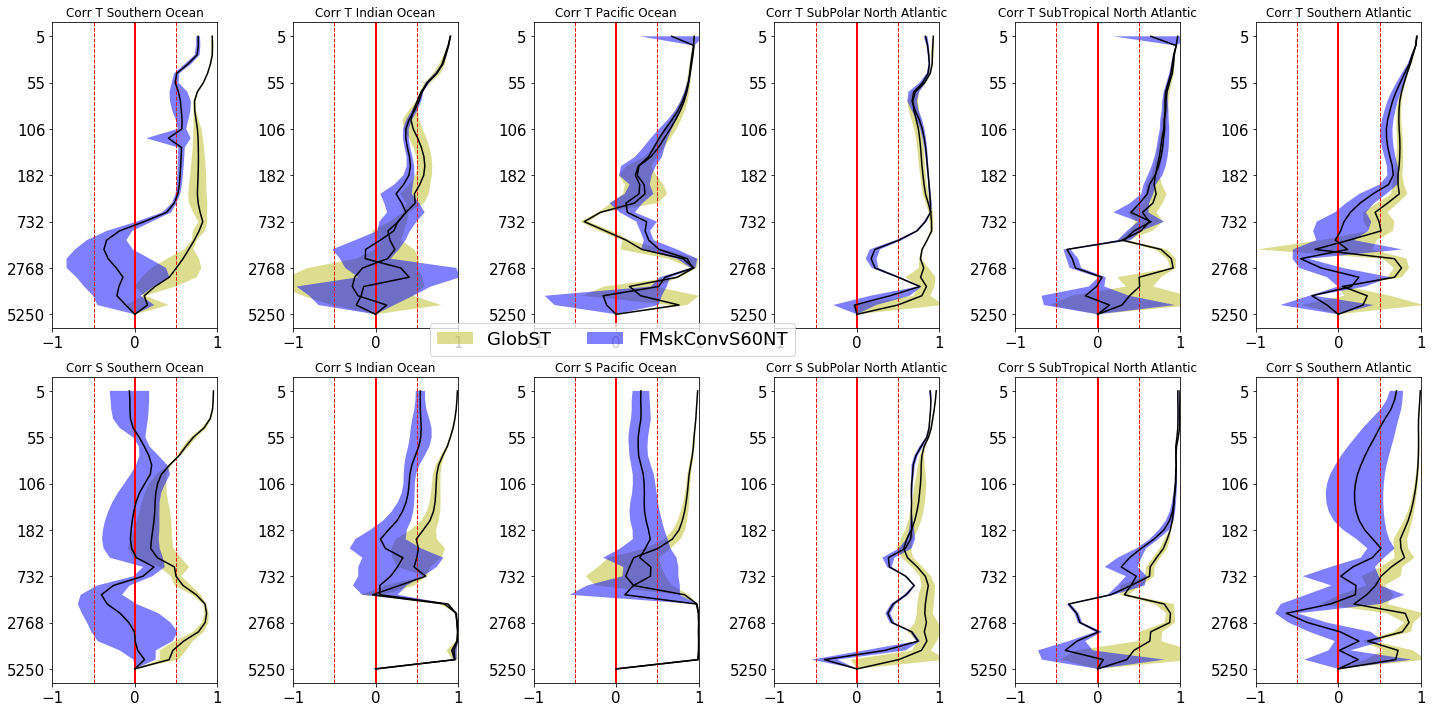

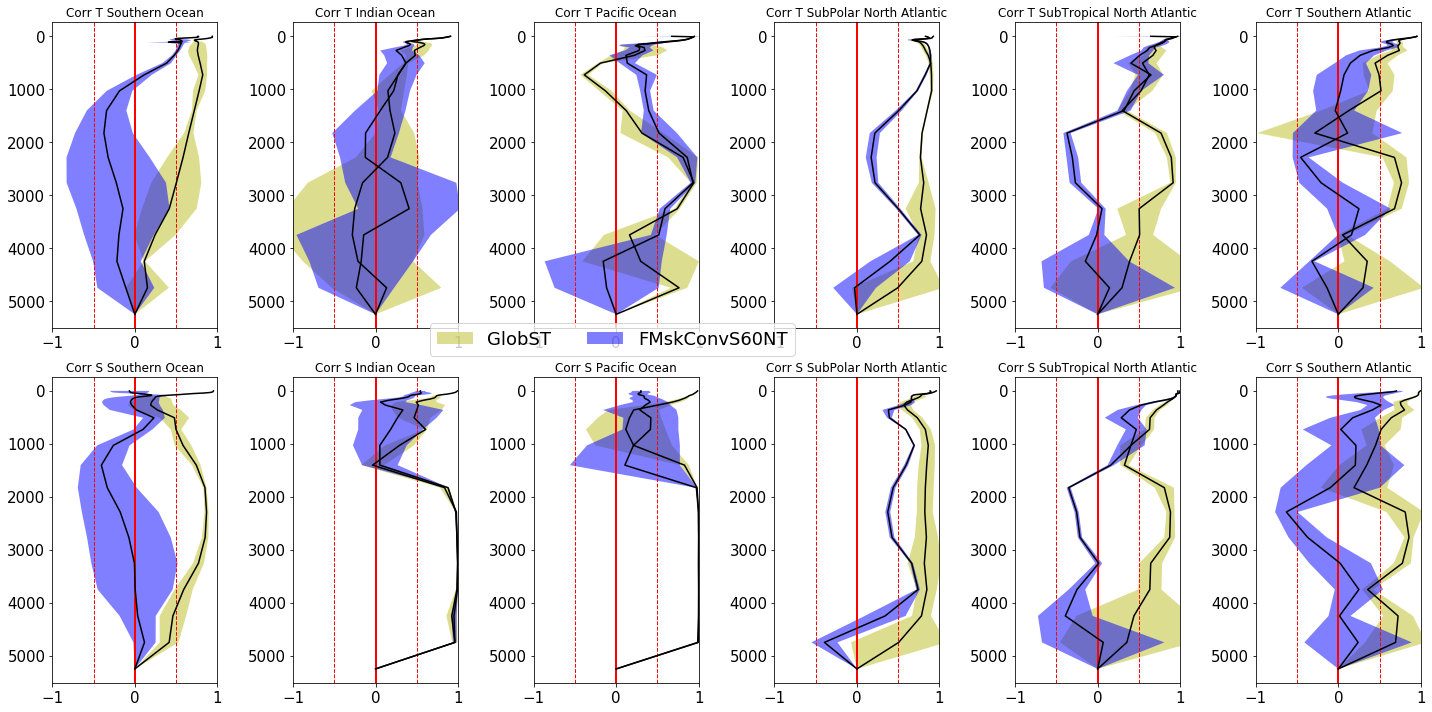

In [77]:
plt.close()
fig, axes = plt.subplots(2,6,figsize=(20,10))

for iRegion in range(nRegions):
    axes[0,iRegion].axvline(x=0, color='r', lw=2)
    axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    
    axes[1,iRegion].axvline(x=0, color='r', lw=2)
    axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    for iensemble in [0,3]:
        Ennsemble = np.zeros((nmembers,31))
    
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[0,iRegion].plot(Average,np.arange(31), color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[0,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std, label = Ensemble[iensemble]['label'],
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[0,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[1,iRegion].plot(Average,np.arange(31), color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[1,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std, facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[1,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)

    axes[0,iRegion].set_xlim((-1,1))

    s=0
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_yticks(np.arange(0,31,5))
    axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
    axes[s,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
    
    s=1
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_yticks(np.arange(0,31,5))
    axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
    axes[s,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
    axes[s,iRegion].set_xlim((-1,1))
    
fig.legend( loc = (0.3, 0.5), ncol=6, fontsize=18 )
plt.tight_layout()   
plt.show()

plt.close()
fig, axes = plt.subplots(2,6,figsize=(20,10))

for iRegion in range(nRegions):
    axes[0,iRegion].axvline(x=0, color='r', lw=2)
    axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    
    axes[1,iRegion].axvline(x=0, color='r', lw=2)
    axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    for iensemble in [0,3]:
        Ennsemble = np.zeros((nmembers,31))
    
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[0,iRegion].plot(Average,depth, color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[0,iRegion].fill_betweenx(depth, Average-Std,  Average+Std, label = Ensemble[iensemble]['label'],
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[0,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[1,iRegion].plot(Average,depth, color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[1,iRegion].fill_betweenx(depth, Average-Std,  Average+Std, facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[1,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)

    

    s=0
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
    axes[s,iRegion].set_xlim((-1,1))
    
    s=1
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
    axes[s,iRegion].set_xlim((-1,1))
    
fig.legend( loc = (0.3, 0.5), ncol=6, fontsize=18 )
plt.tight_layout()   
plt.show()

## Comparison our best protocol so far and Global SST-SSS nudging

i) Outside the Atlantic we do nor do a good job. Surprisingly, pacifi around 2700 m the correlation is very similar.<br>

ii) In the SPG we get worse correlation in the deep ocean (better with S than for T). <br>

iii) In the STG below 1500 we loose all the information <br>

iv) In the southern Atlantic we don't seem to do any good job at all. <br>

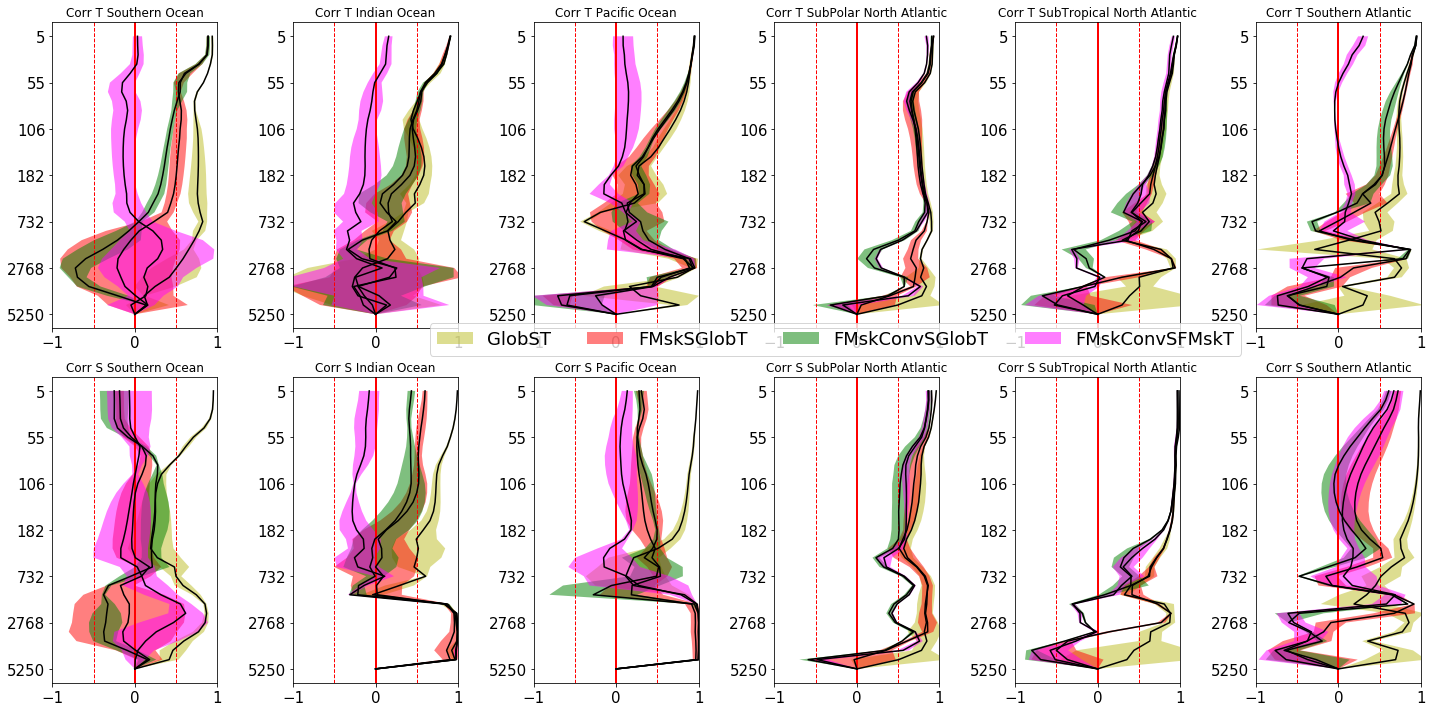

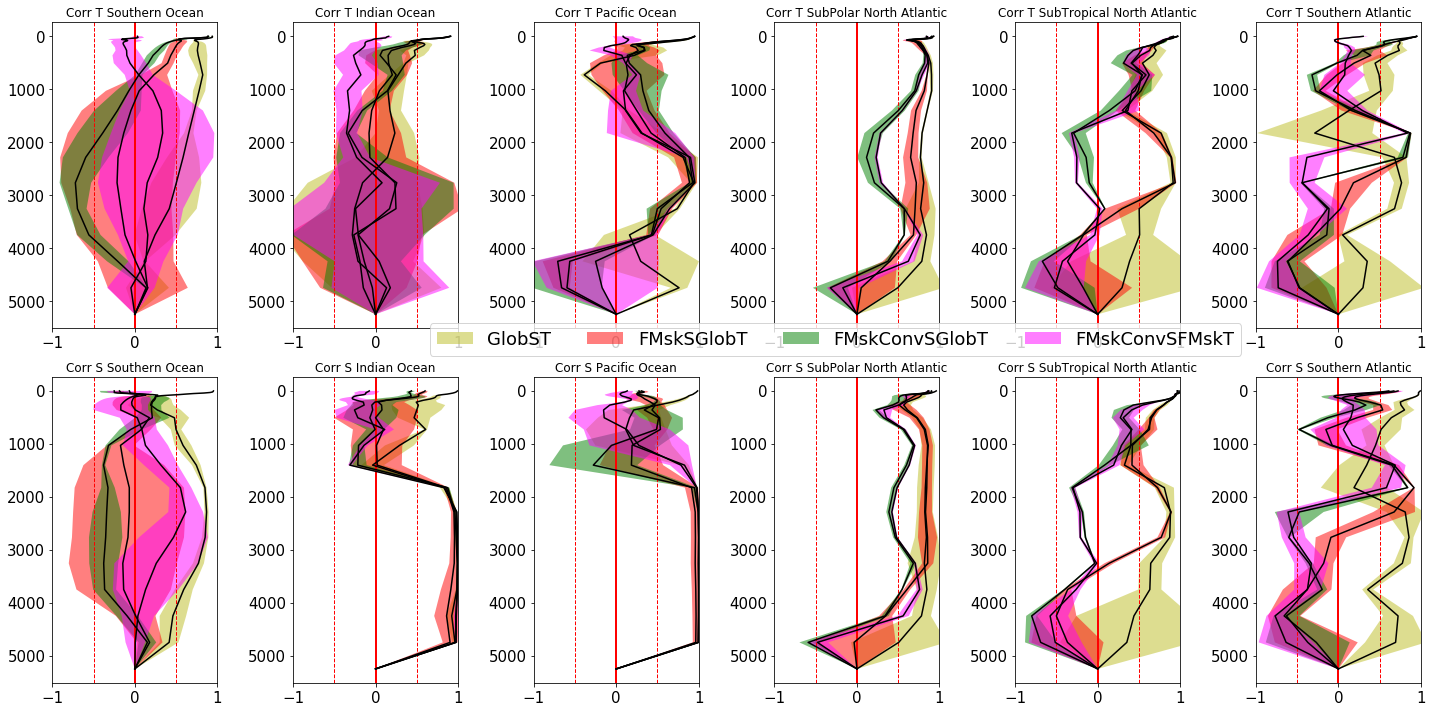

In [97]:
plt.close()
fig, axes = plt.subplots(2,6,figsize=(20,10))

for iRegion in range(nRegions):
    axes[0,iRegion].axvline(x=0, color='r', lw=2)
    axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    
    axes[1,iRegion].axvline(x=0, color='r', lw=2)
    axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    for iensemble in [0,1,2,5]:
        Ennsemble = np.zeros((nmembers,31))
    
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[0,iRegion].plot(Average,np.arange(31), color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[0,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std, label = Ensemble[iensemble]['label'],
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[0,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[1,iRegion].plot(Average,np.arange(31), color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[1,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std, facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[1,iRegion].fill_betweenx(np.arange(31), Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)

    axes[0,iRegion].set_xlim((-1,1))

    s=0
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_yticks(np.arange(0,31,5))
    axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
    axes[s,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
    
    s=1
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_yticks(np.arange(0,31,5))
    axes[s,iRegion].set_yticklabels(np.round(depth[np.arange(0,31,5)],0).astype(int))
    axes[s,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
    axes[s,iRegion].set_xlim((-1,1))
    
fig.legend( loc = (0.3, 0.5), ncol=6, fontsize=18 )
plt.tight_layout()   
plt.show()

plt.close()
fig, axes = plt.subplots(2,6,figsize=(20,10))

for iRegion in range(nRegions):
    axes[0,iRegion].axvline(x=0, color='r', lw=2)
    axes[0,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[0,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    
    axes[1,iRegion].axvline(x=0, color='r', lw=2)
    axes[1,iRegion].axvline(x=0.5, color='r', lw=1, ls='--')
    axes[1,iRegion].axvline(x=-0.5, color='r', lw=1, ls='--')
    for iensemble in [0,1,2,5]:
        Ennsemble = np.zeros((nmembers,31))
    
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[0,iRegion].plot(Average,depth, color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[0,iRegion].fill_betweenx(depth, Average-Std,  Average+Std, label = Ensemble[iensemble]['label'],
                                          facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[0,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        
        for imember in range(nmembers):
            Ennsemble[imember,:]=ma.copy(Correlations_S[iRegion,Ensemble[iensemble]['models'][imember],:])
    
        Std, Average = statsVEP.ensemble_statistics(Ennsemble, nmembers, 31)
        axes[1,iRegion].plot(Average,depth, color =Models[imodel]['color'] )
        
        if iRegion == 0:
            
            axes[1,iRegion].fill_betweenx(depth, Average-Std,  Average+Std, facecolor=Ensemble[iensemble]['color'], alpha=0.5)
        else: 
            axes[1,iRegion].fill_betweenx(depth, Average-Std,  Average+Std,facecolor=Ensemble[iensemble]['color'], alpha=0.5)

    

    s=0
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_title("Corr T " +Regions[iRegion]['name'] )
    axes[s,iRegion].set_xlim((-1,1))
    
    s=1
    axes[s,iRegion].tick_params(axis='y', labelsize=15)
    axes[s,iRegion].tick_params(axis='x', labelsize=15)
    axes[s,iRegion].invert_yaxis()
    axes[s,iRegion].set_title("Corr S " +Regions[iRegion]['name'] )
    axes[s,iRegion].set_xlim((-1,1))
    
fig.legend( loc = (0.3, 0.5), ncol=6, fontsize=18 )
plt.tight_layout()   
plt.show()

## Differences from red to pink: Resolution of SSS in the FDS region (from ORCA2 in red to Convoluted in pink) and SST nudging region (red is global and pink is only the FDS region)

i) In the Atlantic we loose reconstruction from red to pink. In the Southern Ocean and Indian we do similarly not agood job.<br>

ii) In the Atlantic we have similar correlations in the SPG with lower values for tthe FMskConvSFMskT. We loose information in below 1500 m very drastically due to both sst nudgin only in the FDS region and the Convoluted resolution. Compared with the FMskConvSGlobT we can see that the decrease is due to the resolution not to the reduction of nudging region of SST. 

# Further work and questions:

a) Do I look at the average of each of the regions S and T and then transform it to density? Or do I compute density on each of the regions and then the correlation of those density fields?<br>

b) How do I express the significance of each correlation: significance of the mean correlation of the ensemble with respect to the Target or other way? <br>